In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
caminho_pastas = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Teste"

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  caminho_pastas,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3972 files belonging to 3 classes.
Using 3178 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  caminho_pastas,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3972 files belonging to 3 classes.
Using 794 files for validation.


In [7]:
classes = train_ds.class_names
print(classes)

['Arthropoda', 'Bryozoa', 'Mollusca']


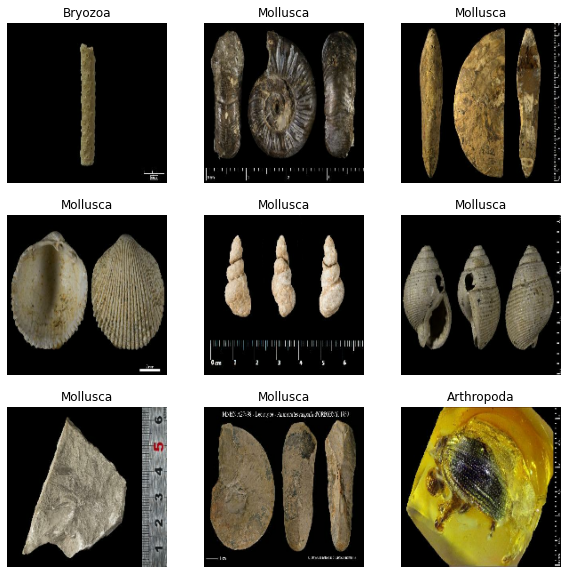

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
camada_normalizada = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (camada_normalizada(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9947687


In [13]:
n_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
100/100 [==============================] - 192s 2s/step - loss: 0.3029 - accuracy: 0.8782 - val_loss: 0.2920 - val_accuracy: 0.8992
Epoch 2/10
100/100 [==============================] - 98s 978ms/step - loss: 0.1745 - accuracy: 0.9292 - val_loss: 0.2931 - val_accuracy: 0.8992
Epoch 3/10
100/100 [==============================] - 98s 978ms/step - loss: 0.1370 - accuracy: 0.9456 - val_loss: 0.2683 - val_accuracy: 0.9219
Epoch 4/10
100/100 [==============================] - 98s 981ms/step - loss: 0.0939 - accuracy: 0.9594 - val_loss: 0.3279 - val_accuracy: 0.9030
Epoch 5/10
100/100 [==============================] - 98s 979ms/step - loss: 0.0550 - accuracy: 0.9786 - val_loss: 0.4154 - val_accuracy: 0.9055
Epoch 6/10
100/100 [==============================] - 98s 980ms/step - loss: 0.0336 - accuracy: 0.9877 - val_loss: 0.4987 - val_accuracy: 0.9068
Epoch 7/10
100/100 [==============================] - 98s 976ms/step - loss: 0.0233 - accuracy: 0.9918 - val_loss: 0.6214 - val_accu

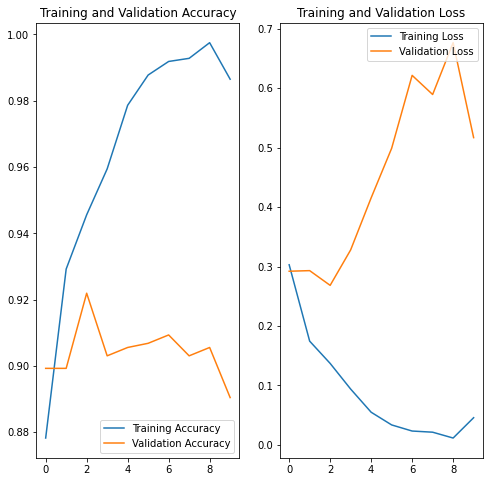

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
teste = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Teste/Arthropoda/Arthropoda_Img_001084.jpg"
teste2 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Teste/Bryozoa/Bryozoa_Img_003731.jpg"
teste3 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Teste/Bryozoa/Bryozoa_Img_003181.jpg"
teste4 = "/content/drive/MyDrive/Projeto_IC_Unicamp/dados/Coletas/Coleta_30-06-2021/Teste/Mollusca/Mollusca_Img_002765.jpg"

testes = [teste, teste2, teste3, teste4]

for i in range(4):
  img = keras.preprocessing.image.load_img(
      testes[i], target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "Essa classe pertence a classe {} com {:.2f}% de precisão."
      .format(classes[np.argmax(score)], 100 * np.max(score))
  )

Essa classe pertence a classe Arthropoda com 99.98% de precisão.
Essa classe pertence a classe Bryozoa com 99.96% de precisão.
Essa classe pertence a classe Bryozoa com 100.00% de precisão.
Essa classe pertence a classe Mollusca com 100.00% de precisão.
